# Individual Question - Why do some international movies flop?

**Taylor Stanley**

**Full-Time**

**Scheduled Project Review: Wed Jun 24, 2020 11am – 11:45am**

**Abhineet Kulkarni**

**BLOG POST URL: https://medium.com/@tcastanley/movie-analysis-why-do-some-international-movies-flop-287db1792cca?sk=aef5c279f461a2868fb17bc2530d6036**

# Set up Notebook & Import Data

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [37]:
df_movie_money = pd.read_csv('CLEAN-BOM_budget_revenues.csv')
df_movie_money = df_movie_money.drop('Unnamed: 0', axis=1)
df_movie_money.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [38]:
df_title_country = pd.read_csv('CLEAN-title_countrylist_count.csv')
df_title_country = df_title_country.drop('Unnamed: 0', axis=1)
df_title_country.head()

,primary_title,country_list,country_count
0,!Women Art Revolution,"['Russian Federation', 'United States']",2
1,#1 Serial Killer,['United States'],1
2,#5,['United States'],1
3,#50Fathers,['United States'],1
4,#66,['Indonesia'],1


## Merge Datasets

In [39]:
df_money_country_combined = df_movie_money.merge(df_title_country, on='primary_title')
print(df_money_country_combined.shape)
df_money_country_combined.head()

(2312, 7)


,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31


# Data Cleaning & Feature Engineering

In [40]:
df_money_country_combined['foreign_gross'] = df_money_country_combined[
    'worldwide_gross'] - df_money_country_combined['domestic_gross']

df_money_country_combined['net_revenue'] = df_money_country_combined[
    'worldwide_gross'] - df_money_country_combined['production_budget']

df_money_country_combined['return_on_investment'] = (
    (df_money_country_combined[
        'worldwide_gross'] - df_money_country_combined[
        'production_budget'])/df_money_country_combined[
        'production_budget'])
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114


In [41]:
def profit_loss_function(ROI):
    
    '''This function takes in an ROI and determins if it value constitues a 
    profit or a loss on a particular investment.
    
    Returns:
    str 'profit' or 'loss'
    
    Eg:
    INPUT:
    profit_loss_function(1.5)
    
    OUTPUT:
    'profit'
    '''
    
    if ROI == 0:
        x = 'break-even'
    if ROI > 0:
        x = 'Profit'
    else:
        x = 'Loss'
    return x
df_money_country_combined['profit/loss'] = df_money_country_combined['return_on_investment'].map(lambda x: profit_loss_function(x))
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit


In [42]:
def country_count_category(value):
    '''This function is meant to be mapped along a DataFrame series.  It is 
    specifically meant to take in a country_count value from a dataframe and 
    assigns it to the appropriate category.  These categories can be 
    manipulated as needed, see the commented out potential changes below.
    
    Returns:
    Assigned categorical value
    
    Example:
    df['country_count'].map(lambda x: country_count_category(x))'''
    
    if value <=10:
        value = '2 - 10'
    elif value > 10 and value <= 20:
        value = '11 - 20'
    elif value > 20 and value <= 30:
        value = '21 - 30'
    elif value > 30 and value <= 40:
        value = '31 - 40'
    else: 
#         value > 40 and value <= 50:
        value = '41 +'
#     elif value > 50 and value <= 60:
#         value = '51 - 60'
#     else: 
#         value = '61 +'
    return value
    
df_money_country_combined['country_count_category'] = df_money_country_combined['country_count'].map(lambda x: country_count_category(x))
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


In [43]:
df_money_country_combined.describe()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
count,2.312000e+03,2.312000e+03,2.312000e+03,2312.000000,2.312000e+03,2.312000e+03,2312.000000
mean,3.616620e+07,4.542157e+07,1.094395e+08,16.823529,6.401789e+07,7.327325e+07,2.938161
std,4.975889e+07,7.692804e+07,2.125942e+08,11.901914,1.419744e+08,1.765303e+08,15.251251
min,1.400000e+03,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-2.002376e+08,-1.000000
25%,5.000000e+06,6.330352e+05,2.507176e+06,4.000000,6.354900e+04,-2.000000e+06,-0.649132
50%,1.800000e+07,1.847207e+07,3.147508e+07,18.000000,9.988500e+06,1.088659e+07,0.664908
75%,4.462500e+07,5.476247e+07,1.099793e+08,27.000000,5.684128e+07,7.053940e+07,2.699245
max,4.250000e+08,7.605076e+08,2.776345e+09,47.000000,2.015838e+09,2.351345e+09,415.564740


## Final Step of Cleaning

In [44]:
df_money_country_combined = df_money_country_combined[(df_money_country_combined['worldwide_gross'] != 0)
                                  &
                                  (df_money_country_combined['domestic_gross'] != 0)]

df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


# Data Exploration Analysis & Visualization

## A Mean vs. Median Look at Our Data

In [45]:
df_money_country_combined.groupby('profit/loss').median()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
profit/loss,,,,,,,
Loss,14000000.0,2000000.0,4221341.0,11,511993.0,-6283172.0,-0.645164
Profit,27250000.0,42901464.5,82212396.5,25,37471168.0,49355515.5,2.075303


In [46]:
df_money_country_combined.groupby('profit/loss').mean()

,production_budget,domestic_gross,worldwide_gross,country_count,foreign_gross,net_revenue,return_on_investment
profit/loss,,,,,,,
Loss,2.367195e+07,7.006051e+06,1.280020e+07,11.946274,5.794153e+06,-1.087175e+07,-0.601145
Profit,4.769707e+07,7.100715e+07,1.724806e+08,21.046414,1.014734e+08,1.247835e+08,5.195709


## What is the Distribution of Movies that are Profitable?

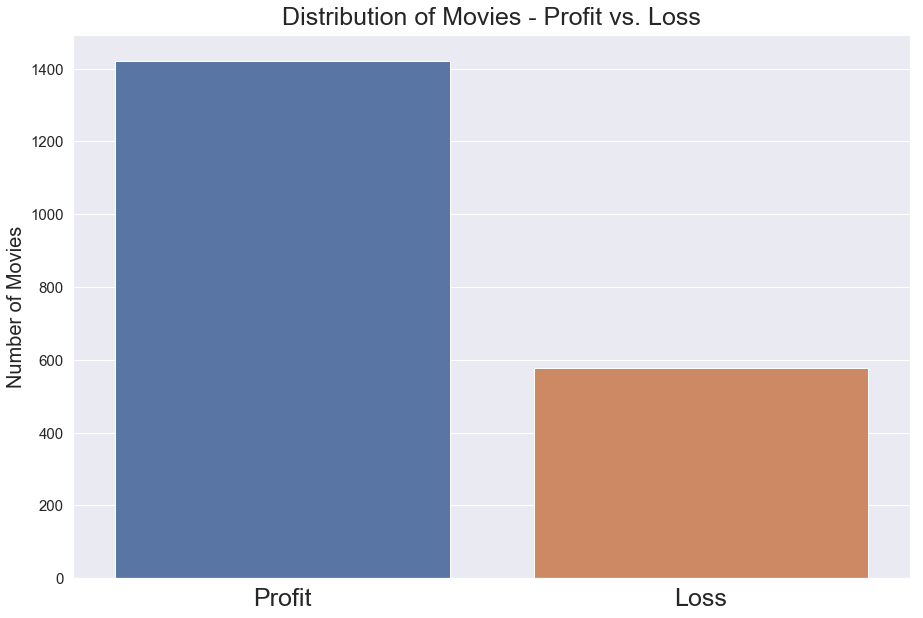

In [47]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(x=df_money_country_combined['profit/loss']);

plt.xlabel('')
plt.xticks(fontsize=25)
plt.ylabel('Number of Movies', fontsize=20)
plt.yticks(fontsize=15)
plt.title('Distribution of Movies - Profit vs. Loss', fontsize=25, pad=10);

## What is the Median Net Revenue of each?

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


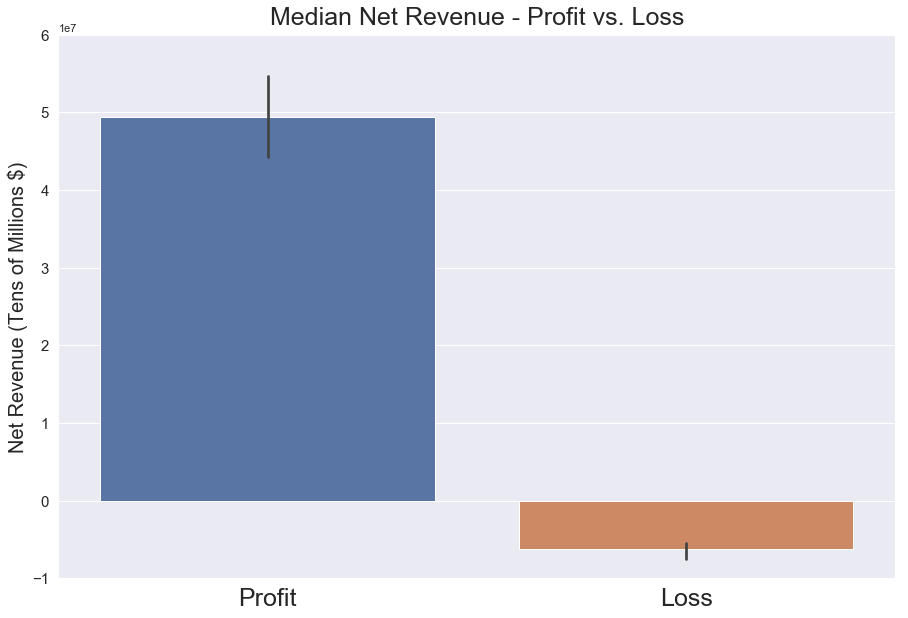

In [48]:
plt.figure(figsize=(15,10))

sns.barplot(x=df_money_country_combined['profit/loss'],
            y=df_money_country_combined['net_revenue'],
            estimator=np.median);

plt.ylim(-1e7, 6e7)
plt.xlabel('');
plt.xticks(fontsize=25);
plt.ylabel('Net Revenue (Tens of Millions $)', fontsize=20);
plt.yticks(fontsize=15);
plt.title('Median Net Revenue - Profit vs. Loss', fontsize=25, pad=10);

**Ok, so we know that movies tend to be profitable more times than not, though who would keep making movies if that WASN'T the case?!  We can also observe that the median net revenue for a profitable movies can be very substantial.  Next, let's take a look at how these trends have been throughout recent history.**

## Movie Trends Over Time

In [49]:
latest_movie = df_money_country_combined['release_date'].max()
print(latest_movie)
earliest_movie = df_money_country_combined['release_date'].min()
print(earliest_movie)

def year_from_date(date):
    year = date.split('-')
    return year[0]

df_money_country_combined['release_date'] = df_money_country_combined['release_date'].map(lambda x: year_from_date(x))
df_money_country_combined.head()

2019-06-14
1915-02-08


,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


### Movie Releases Per Year

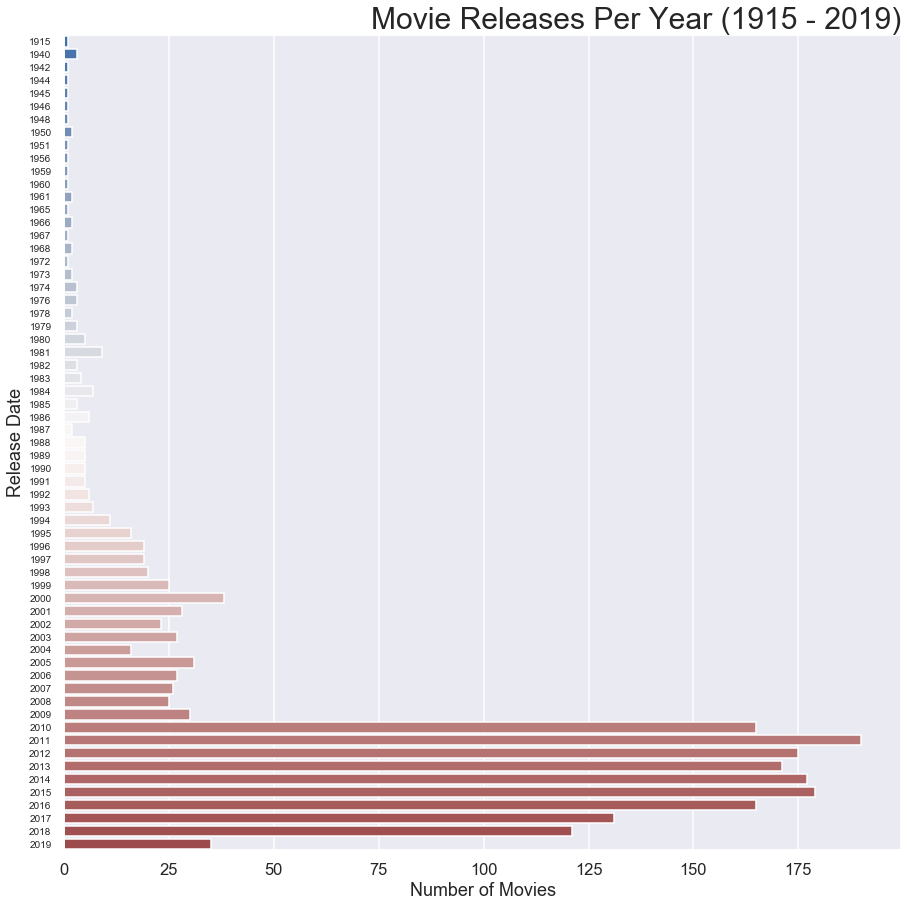

In [50]:
plt.figure(figsize=(15,15));
sns.set(context='talk')

palette = sns.light_palette("darkblue", n_colors=2)

sns.countplot(y=df_money_country_combined['release_date'].sort_values(ascending=False), orient='h', palette='vlag');

plt.xlabel('Number of Movies');
plt.ylabel('Release Date');
plt.yticks(fontsize=10);
plt.title('Movie Releases Per Year (1915 - 2019)', fontsize=30, loc='right');

**As we can see, there is a massive spike in information available for movies made after 2010.  Let's take a look at data since the year 2000 though and give ourselves a better sample size.**

### Movies Released Between 2000 - 2019

In [32]:
df_money_country_combined['release_date'] = df_money_country_combined['release_date'].astype(int)
df_money_country_combined = df_money_country_combined[df_money_country_combined['release_date'] >= 2000]
df_money_country_combined.head()

,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,country_list,country_count,foreign_gross,net_revenue,return_on_investment,profit/loss,country_count_category
0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,['Japan'],1,2.015838e+09,2.351345e+09,5.532577,Profit,2 - 10
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"['Japan', 'Sweden', 'Peru', 'Ukraine', 'United...",39,8.046000e+08,6.350639e+08,1.546673,Profit,31 - 40
2,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"['France', 'Mexico', 'Italy', 'Poland', 'Hunga...",32,1.070000e+08,-2.002376e+08,-0.572108,Loss,31 - 40
3,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"['Azerbaijan', 'Peru', 'United States', 'Israe...",34,9.440081e+08,1.072414e+09,3.243841,Profit,31 - 40
4,2018,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"['Argentina', 'Spain', 'Serbia', 'United State...",31,1.369319e+09,1.748134e+09,5.827114,Profit,31 - 40


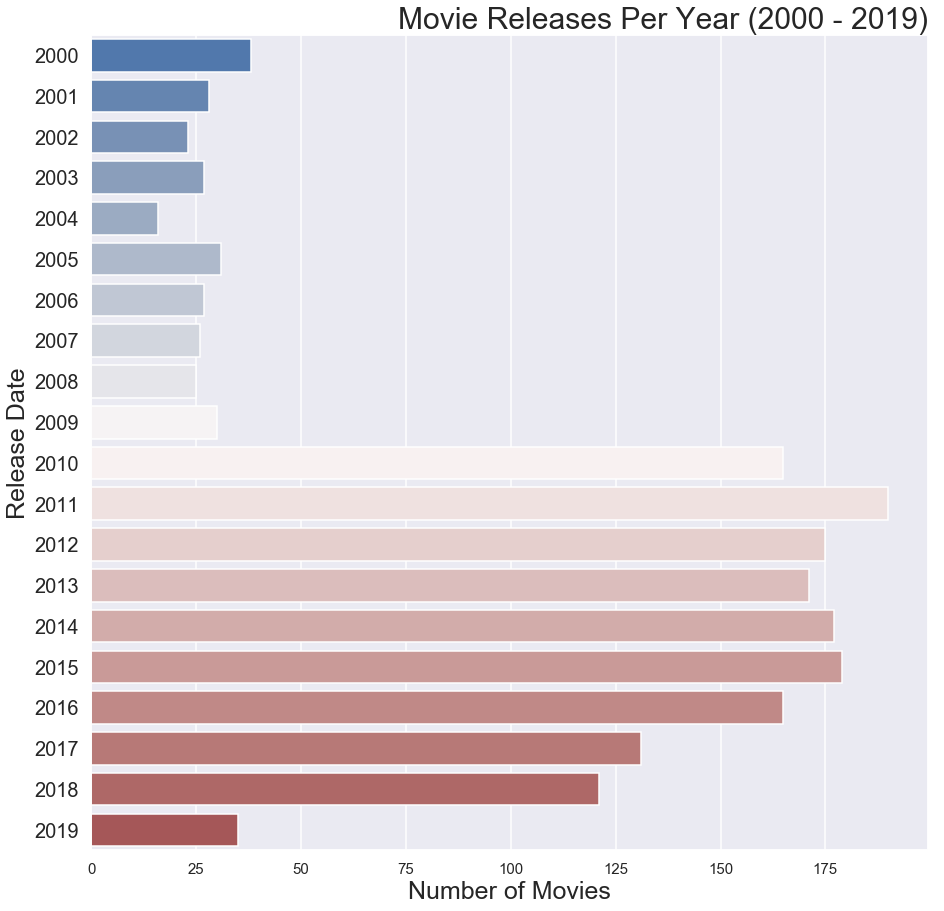

In [33]:
plt.figure(figsize=(15,15));
sns.set(context='talk')

palette = sns.light_palette("darkblue", n_colors=2)

sns.countplot(y=df_money_country_combined['release_date'].sort_values(ascending=False), palette='vlag');

plt.xlabel('Number of Movies', fontsize=25);
plt.ylabel('Release Date', fontsize=25);
plt.xticks(fontsize=15);
plt.yticks(fontsize=20);
plt.title('Movie Releases Per Year (2000 - 2019)', fontsize=30, loc='right');

## Revenue vs. Production Costs (2000 - 2019)

**Now that we have a lot of data for a pretty recent time frame, let's have a look at the relationship between costs and their associated revenues over the past 19 years.  What I am looking for is some sort of " Tipping Point", where we may be able to determine if a movie will be a profit or loss!  This may give us some insight into our question:**

**What makes international movies fail?**

(1780, 12)
(20, 7)


C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


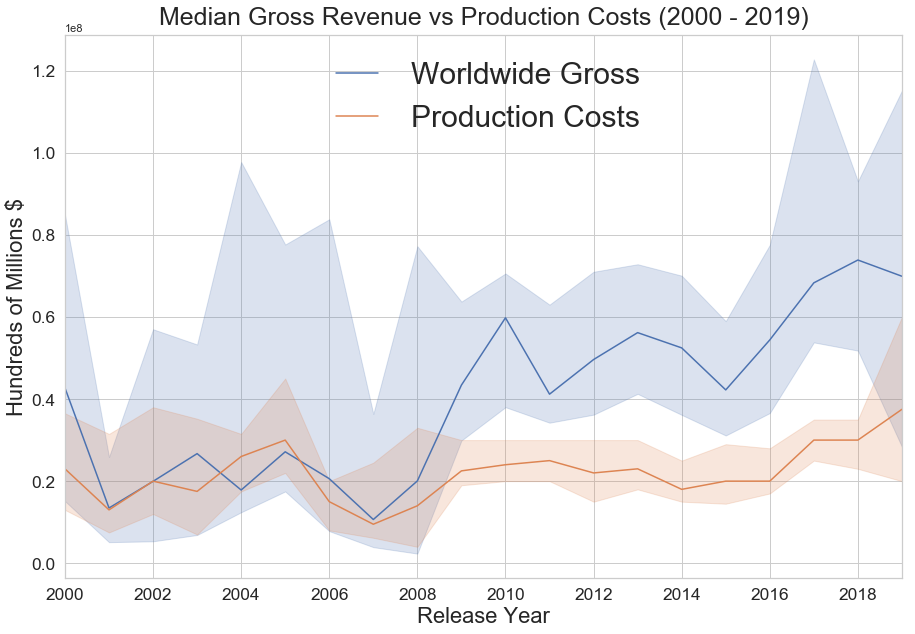

In [34]:
from matplotlib.ticker import MaxNLocator
print(df_money_country_combined.shape)
df_movies_over_time = df_money_country_combined.groupby('release_date').median()
print(df_movies_over_time.shape)

sns.set(style='whitegrid')

ax = plt.figure(figsize=(15,10)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True));

sns.lineplot(x='release_date',
             y='worldwide_gross',
             data=df_money_country_combined,
             estimator=np.median,
             ax=ax);

sns.lineplot(x='release_date',
             y='production_budget',
             data=df_money_country_combined,
             estimator=np.median,
             ax=ax);


plt.xlabel('Release Year', fontsize=22);
plt.xlim(2000,2019);
plt.xticks(size='x-large')

plt.ylabel('Hundreds of Millions $', fontsize=22);
plt.yticks(size='x-large')

plt.legend(['Worldwide Gross', 'Production Costs'], frameon=False, fontsize=30, loc='upper center', numpoints=3);
plt.title('Median Gross Revenue vs Production Costs (2000 - 2019)', fontsize=25, loc='center', pad=10);

**We can observe above that there seemed to exist a relatively stable balance between costs and revenue up until around 2008.  We should also remember that we also had a very large increase in information available for movies made post 2010.  Regardless, we see a shift in the relationship afterwards as the gap between the two widens significantly.**

**So what does this mean?**

**Perhaps the rapid proliferation and improvement of web services around 2010 meant that production companies could reduce costs for their marketing efforts? What if there is a relationship here between the consumption of entertainment and fiction in the western world while it was going through the financial crisis of 2008? Or maybe that was the dawn of the superhero movie craze.  It is worth noting that between 2008-2011 Marvel released their Iron Man 1 & 2, The Incredible Hulk, Thor, and Captain America movies.  Seeing as the movies in this universe now account for a massive market share of the industry, it would not be unreasonable to think that they could have sparked new interest in films for an entire generation.**